In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from pathlib import Path

In [2]:
# Set up paths dynamically
current_dir = Path.cwd()
project_root = current_dir.parent if current_dir.name == 'code' else current_dir
code_dir = project_root / 'code'
data_dir = project_root / 'data'
figures_dir = project_root / 'figures'

# Create directories if they don't exist
data_dir.mkdir(exist_ok=True)
figures_dir.mkdir(exist_ok=True)

# Add code directory to Python path
sys.path.append(str(code_dir))

print(f"Project root: {project_root}")
print(f"Code directory: {code_dir}")
print(f"Data directory: {data_dir}")
print(f"Figures directory: {figures_dir}")


Project root: /Users/harashimakoshi/CS332/332Project2
Code directory: /Users/harashimakoshi/CS332/332Project2/code
Data directory: /Users/harashimakoshi/CS332/332Project2/data
Figures directory: /Users/harashimakoshi/CS332/332Project2/figures


In [3]:
# Import custom modules
from A_afp import AdversarialFairPayoffs
from B_bp import BernoulliPayoffs
from C_pp import EspacePayoffs
from D_rp import ResearchPayoffs
from EG import ExponentiatedGradient
from EW import ExponentialWeights
from MC import MonteCarloSimulation

In [4]:
# Fixed parameters
k = 10
n = 1000
num_simulations = 100  # Monte Carlo simulation times

# Epsilon values
epsilon_values = {
    'random': 0.01,  
    'optimal': np.sqrt(np.log(k) / n), 
    'FTL': 100  
}


# A

In [34]:
# AdversarialFairPayoffs environment

# Save results
results_data = []
payoff_progression_data = {}  # Store payoff progression data for plotting

for epsilon_name, epsilon_value in epsilon_values.items():
    print(f"\nRunning simulations for {epsilon_name} (epsilon = {epsilon_value:.6f})...")
    
    regret_histories = []
    total_payoffs = []
    payoff_histories = []  # Store payoff histories for progression analysis
    
    for sim in range(num_simulations):
        env = AdversarialFairPayoffs(k)
        algorithm = ExponentialWeights(k, epsilon=epsilon_value, n=n)
        
        # Run algorithm
        regret_history, total_payoff, cumulative_payoffs, payoff_history = algorithm.run_algorithm(env.generate_payoffs)
        
        regret_histories.append(regret_history)
        total_payoffs.append(total_payoff)
        payoff_histories.append(payoff_history)  # Store payoff progression
        
        if (sim + 1) % 20 == 0:
            print(f"  Completed {sim + 1}/{num_simulations} simulations")
    
    # Store payoff progression data for this epsilon type
    payoff_progression_data[epsilon_name] = {
        'rounds': list(range(1, n + 1)),
        'mean_payoff': np.mean(payoff_histories, axis=0).tolist(),
        'std_payoff': np.std(payoff_histories, axis=0).tolist(),
        'epsilon_value': epsilon_value
    }
    
    # Add results to dataframe
    regret_array = np.array(regret_histories)
    payoff_array = np.array(payoff_histories)
    mean_regret = np.mean(regret_array, axis=0)
    std_regret = np.std(regret_array, axis=0)
    mean_payoff = np.mean(payoff_array, axis=0)
    std_payoff = np.std(payoff_array, axis=0)
    final_regrets = regret_array[:, -1]
    final_payoffs = payoff_array[:, -1]
    
    for round_num in range(n):
        results_data.append({
            'round': round_num + 1,
            'epsilon_type': epsilon_name,
            'epsilon_value': epsilon_value,
            'mean_regret': mean_regret[round_num],
            'std_regret': std_regret[round_num],
            'mean_payoff': mean_payoff[round_num],
            'std_payoff': std_payoff[round_num],
            'final_regret_mean': np.mean(final_regrets),
            'final_regret_std': np.std(final_regrets),
            'final_payoff_mean': np.mean(final_payoffs),
            'final_payoff_std': np.std(final_payoffs)
        })

print("\nAll simulations completed!")

results_df = pd.DataFrame(results_data)

# Save results to csv file
adversarial_csv_path = data_dir / 'adversarial_fair_payoffs_results.csv'
results_df.to_csv(adversarial_csv_path, index=False)
print(f"Results saved to {adversarial_csv_path}")

# Statistical results
print("\nFinal regret statistics:")
for epsilon_name in research_eg_df["epsilon_type"].unique():
    subset = results_df[results_df['epsilon_type'] == epsilon_name]
    final_stats = subset.iloc[0]  
    print(f"  {epsilon_name}: Mean = {final_stats['final_regret_mean']:.4f}, Std = {final_stats['final_regret_std']:.4f}")



Running simulations for random (epsilon = 0.010000)...
  Completed 20/100 simulations
  Completed 40/100 simulations
  Completed 60/100 simulations
  Completed 80/100 simulations
  Completed 100/100 simulations

Running simulations for optimal (epsilon = 0.047985)...
  Completed 20/100 simulations
  Completed 40/100 simulations
  Completed 60/100 simulations
  Completed 80/100 simulations
  Completed 100/100 simulations

Running simulations for FTL (epsilon = 100.000000)...
  Completed 20/100 simulations
  Completed 40/100 simulations
  Completed 60/100 simulations
  Completed 80/100 simulations
  Completed 100/100 simulations

All simulations completed!
Results saved to /Users/harashimakoshi/CS332/332Project2/data/adversarial_fair_payoffs_results.csv

Final regret statistics:
  random: Mean = 1.0327, Std = 5.0961
  optimal: Mean = 0.9987, Std = 5.6458
  FTL: Mean = 50.3441, Std = 0.7939


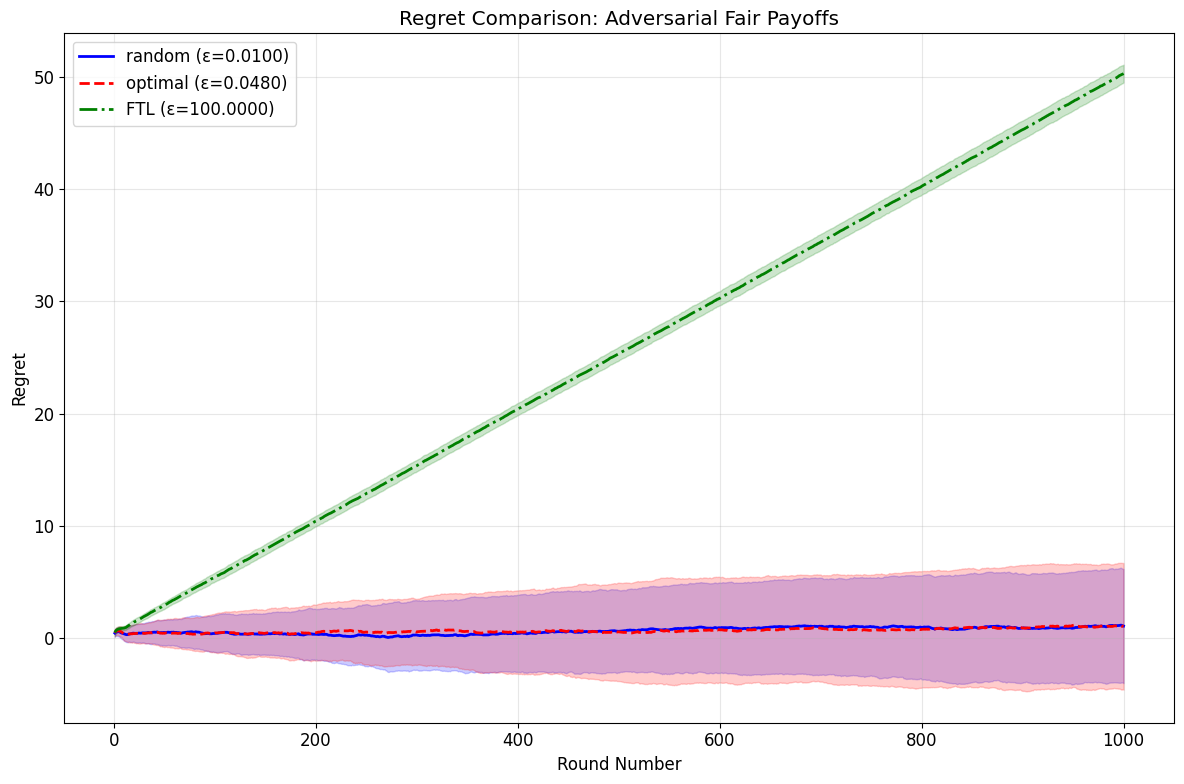

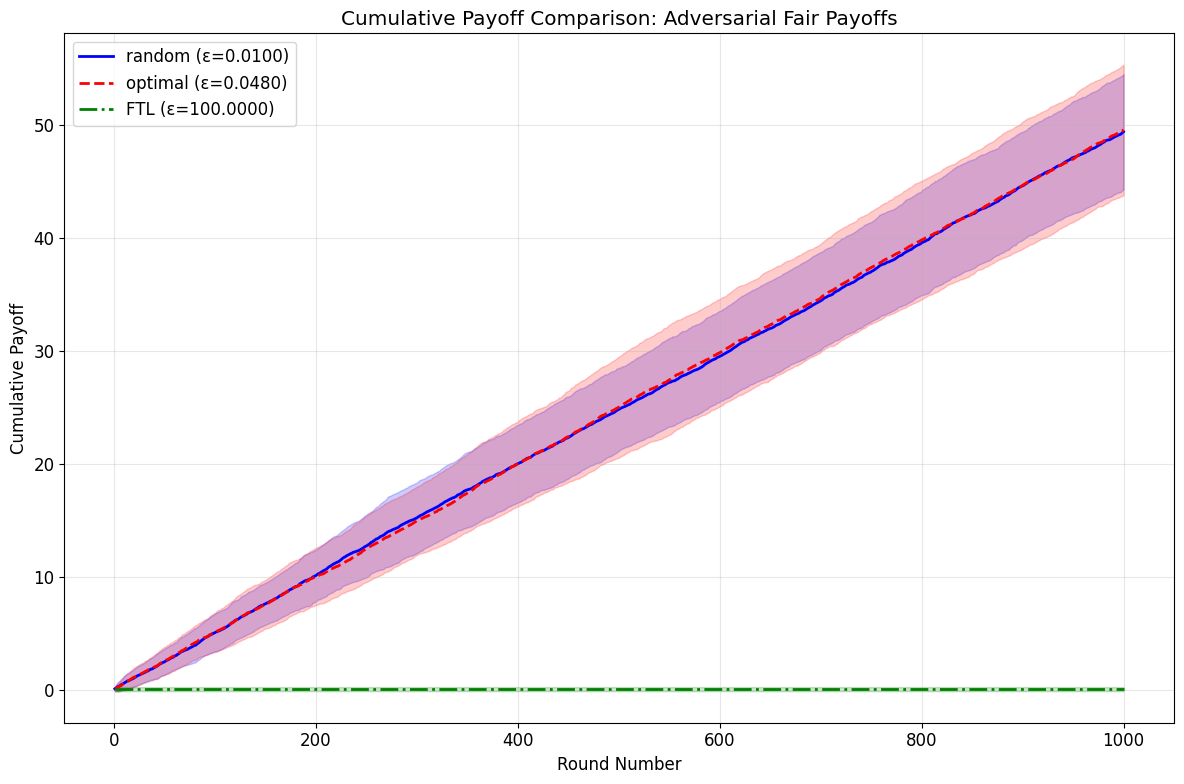

In [6]:
# Import visualization functions and run plots
import visualization

# Load the data
adversarial_df = pd.read_csv(adversarial_csv_path)

# Use the plot_regret_comparison function from visualization.py
visualization.plot_regret_comparison(adversarial_df, 'Adversarial Fair Payoffs', 'adversarial_regret_comparison.png')

# Plot payoff progression if data is available
visualization.plot_payoff_comparison(adversarial_df, "Adversarial Fair Payoffs", "afp_payoff_progression.png")

# B

In [13]:
# BernoulliPayoffs environment

# Save results
results_data_bernoulli = []
payoff_progression_data_bernoulli = {}  # Store payoff progression data for plotting

for epsilon_name, epsilon_value in epsilon_values.items():
    print(f"\nRunning simulations for {epsilon_name} (epsilon = {epsilon_value:.6f})...")
    
    regret_histories = []
    total_payoffs = []
    payoff_histories = []  # Store payoff histories for progression analysis
    
    for sim in range(num_simulations):
        env = BernoulliPayoffs(k)
        algorithm = ExponentialWeights(k, epsilon=epsilon_value, n=n)
        
        # Run algorithm
        regret_history, total_payoff, cumulative_payoffs, payoff_history = algorithm.run_algorithm(env.generate_payoffs)
        
        regret_histories.append(regret_history)
        total_payoffs.append(total_payoff)
        payoff_histories.append(payoff_history)  # Store payoff progression
        
        if (sim + 1) % 20 == 0:
            print(f"  Completed {sim + 1}/{num_simulations} simulations")
    
    # Store payoff progression data for this epsilon type
    payoff_progression_data_bernoulli[epsilon_name] = {
        'rounds': list(range(1, n + 1)),
        'mean_payoff': np.mean(payoff_histories, axis=0).tolist(),
        'std_payoff': np.std(payoff_histories, axis=0).tolist(),
        'epsilon_value': epsilon_value
    }
    
    # Add results to dataframe
    regret_array = np.array(regret_histories)
    payoff_array = np.array(payoff_histories)
    mean_regret = np.mean(regret_array, axis=0)
    std_regret = np.std(regret_array, axis=0)
    mean_payoff = np.mean(payoff_array, axis=0)
    std_payoff = np.std(payoff_array, axis=0)
    final_regrets = regret_array[:, -1]
    final_payoffs = payoff_array[:, -1]
    
    for round_num in range(n):
        results_data_bernoulli.append({
            'round': round_num + 1,
            'epsilon_type': epsilon_name,
            'epsilon_value': epsilon_value,
            'mean_regret': mean_regret[round_num],
            'std_regret': std_regret[round_num],
            'mean_payoff': mean_payoff[round_num],
            'std_payoff': std_payoff[round_num],
            'final_regret_mean': np.mean(final_regrets),
            'final_regret_std': np.std(final_regrets),
            'final_payoff_mean': np.mean(final_payoffs),
            'final_payoff_std': np.std(final_payoffs)
        })

print("\nAll simulations completed!")

results_df_bernoulli = pd.DataFrame(results_data_bernoulli)

# Save results to csv file
bernoulli_csv_path = data_dir / 'bernoulli_payoffs_results.csv'
results_df_bernoulli.to_csv(bernoulli_csv_path, index=False)
print(f"Results saved to {bernoulli_csv_path}")

# Statistical results
print("\nFinal regret statistics:")
for epsilon_name in research_eg_df["epsilon_type"].unique():
    subset = results_df_bernoulli[results_df_bernoulli['epsilon_type'] == epsilon_name]
    final_stats = subset.iloc[0]  
    print(f"  {epsilon_name}: Mean = {final_stats['final_regret_mean']:.4f}, Std = {final_stats['final_regret_std']:.4f}")



Running simulations for random (epsilon = 0.010000)...
Bernoulli probabilities for each action: [0.04431129 0.06765469 0.07512156 0.49456532 0.12226149 0.3043065
 0.13655279 0.26901127 0.21371464 0.34936117]
Bernoulli probabilities for each action: [0.09328039 0.13324673 0.06655809 0.20785789 0.40540871 0.19938607
 0.03992043 0.17242246 0.00333305 0.06954252]
Bernoulli probabilities for each action: [0.46653857 0.38807401 0.4744433  0.02649489 0.3512768  0.35068467
 0.20876304 0.2459727  0.00660981 0.3478317 ]
Bernoulli probabilities for each action: [0.27014417 0.36222509 0.28519461 0.20034661 0.19695496 0.41411396
 0.44665828 0.13528787 0.36332998 0.07971641]
Bernoulli probabilities for each action: [0.27683397 0.45941848 0.16813501 0.35239901 0.38943073 0.16153077
 0.48912589 0.09354117 0.11712824 0.31716737]
Bernoulli probabilities for each action: [0.03238237 0.28276359 0.02867412 0.20972533 0.15122828 0.24368972
 0.46042352 0.08167193 0.39879871 0.47976886]
Bernoulli probabiliti

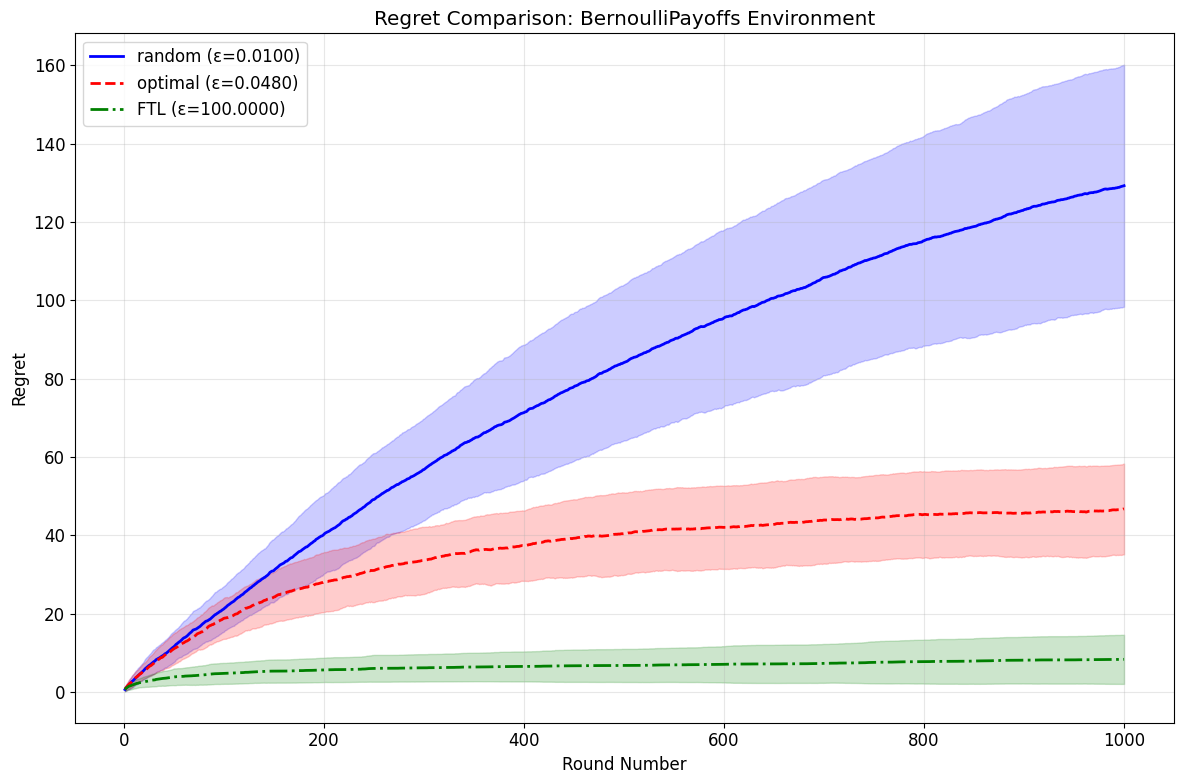

Generating payoff progression plot from CSV...


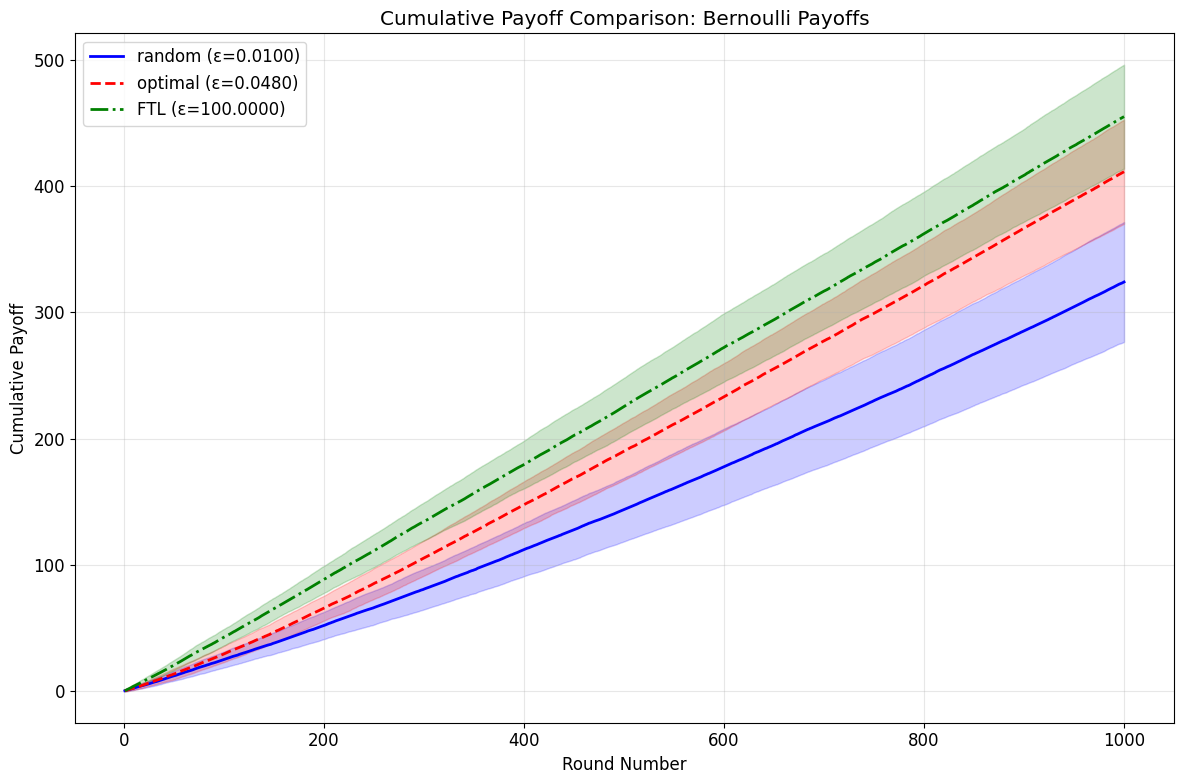

In [ ]:
# Import visualization functions and run plots
import visualization

# Load the data
bernoulli_df = pd.read_csv(bernoulli_csv_path)

# Use the plot_regret_comparison function from visualization.py
visualization.plot_regret_comparison(bernoulli_df, 'BernoulliPayoffs Environment', 'bernoulli_regret_comparison.png')

# Plot payoff progression from CSV data
visualization.plot_payoff_comparison(bernoulli_df, "Bernoulli Payoffs", "bernoulli_payoff_progression.png")


# C

In [5]:
# C. エスパス5店舗データ - EWアルゴリズム

# エスパス5店舗でのEWアルゴリズム実行
print("エスパス5店舗でのEWアルゴリズム実行...")

# エスパス用のパラメータ
k_espace = 5  # 5店舗
n_espace = 2317  # データ日数に合わせる

# エスパス用のepsilon値
epsilon_values_espace = {
    'random': 0.01,
    'optimal': np.sqrt(np.log(k_espace) / n_espace),  # n_espaceを使用
    'FTL': 100
}

print(f"エスパス用Epsilon値 (k={k_espace}):")
for name, value in epsilon_values_espace.items():
    print(f"  {name}: {value:.6f}")

# エスパス結果保存用
espace_results = []

for epsilon_name, epsilon_value in epsilon_values_espace.items():
    print(f"\nエスパス {epsilon_name} (epsilon = {epsilon_value:.6f}) 実行中...")
    
    # 各シミュレーションの結果を保存
    regret_histories = []
    total_payoffs = []
    
    for sim in range(num_simulations):
        env = EspacePayoffs(k_espace)
        algorithm = ExponentialWeights(k_espace, epsilon=epsilon_value, n=n_espace)  # epsilon_valueを修正
        
        # Run algorithm
        regret_history, total_payoff, action_history, cumulative_payoffs = algorithm.run_algorithm(env.generate_payoffs)
        
        regret_histories.append(regret_history)
        total_payoffs.append(total_payoff)
        
        if (sim + 1) % 20 == 0:
            print(f"  完了: {sim + 1}/{num_simulations} シミュレーション")
    
    # 結果を保存
    for i, (regret_history, total_payoff) in enumerate(zip(regret_histories, total_payoffs)):
        espace_results.append({
            'epsilon': epsilon_name,
            'epsilon_value': epsilon_value,
            'simulation': i,
            'round': list(range(1, n_espace + 1)),  # n_espaceを使用
            'cumulative_regret': regret_history,
            'cumulative_payoff': total_payoff
        })
    
    print(f"  完了: {len(regret_histories)} シミュレーション")

print(f"\nエスパス結果数: {len(espace_results)}")

エスパス5店舗でのEWアルゴリズム実行...
エスパス用Epsilon値 (k=5):
  random: 0.010000
  optimal: 0.026356
  FTL: 100.000000

エスパス random (epsilon = 0.010000) 実行中...
  エスパス秋葉原駅前店 : 88.78
  エスパス渋谷駅前新館: 24.97
  エスパス渋谷本館: 41.60
  エスパス新宿歌舞伎町店: 69.88
  エスパス上野本館: 22.53
  エスパス秋葉原駅前店 : 88.78
  エスパス渋谷駅前新館: 24.97
  エスパス渋谷本館: 41.60
  エスパス新宿歌舞伎町店: 69.88
  エスパス上野本館: 22.53
  エスパス秋葉原駅前店 : 88.78
  エスパス渋谷駅前新館: 24.97
  エスパス渋谷本館: 41.60
  エスパス新宿歌舞伎町店: 69.88
  エスパス上野本館: 22.53
  エスパス秋葉原駅前店 : 88.78
  エスパス渋谷駅前新館: 24.97
  エスパス渋谷本館: 41.60
  エスパス新宿歌舞伎町店: 69.88
  エスパス上野本館: 22.53
  エスパス秋葉原駅前店 : 88.78
  エスパス渋谷駅前新館: 24.97
  エスパス渋谷本館: 41.60
  エスパス新宿歌舞伎町店: 69.88
  エスパス上野本館: 22.53
  エスパス秋葉原駅前店 : 88.78
  エスパス渋谷駅前新館: 24.97
  エスパス渋谷本館: 41.60
  エスパス新宿歌舞伎町店: 69.88
  エスパス上野本館: 22.53
  エスパス秋葉原駅前店 : 88.78
  エスパス渋谷駅前新館: 24.97
  エスパス渋谷本館: 41.60
  エスパス新宿歌舞伎町店: 69.88
  エスパス上野本館: 22.53
  エスパス秋葉原駅前店 : 88.78
  エスパス渋谷駅前新館: 24.97
  エスパス渋谷本館: 41.60
  エスパス新宿歌舞伎町店: 69.88
  エスパス上野本館: 22.53
  エスパス秋葉原駅前店 : 88.78
  エスパス渋谷駅前新

/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_3601/1025763526.py:30: UserWarning: Glyph 12456 (\N{KATAKANA LETTER E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_3601/1025763526.py:30: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_3601/1025763526.py:30: UserWarning: Glyph 12497 (\N{KATAKANA LETTER PA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_3601/1025763526.py:30: UserWarning: Glyph 24215 (\N{CJK UNIFIED IDEOGRAPH-5E97}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_3601/1025763526.py:30: UserWarning: Glyph 33303 (\N{CJK UNIFIED IDEOGRAPH-8217}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/i

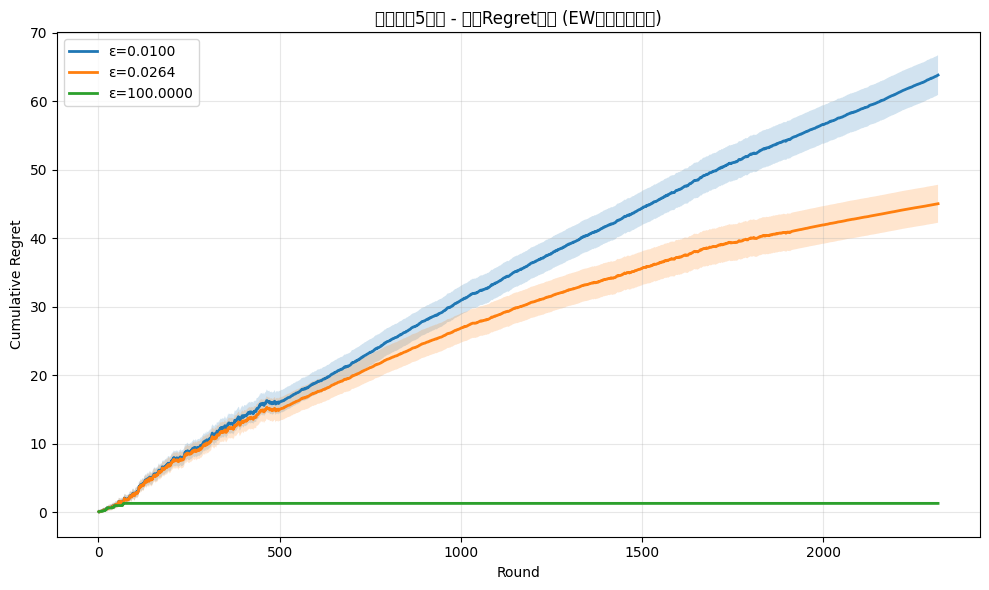

In [6]:
# エスパス結果の可視化（Regretのみ）
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# 累積regretの比較
for epsilon_name in epsilon_values_espace.keys():
    # 各epsilonの結果を取得
    epsilon_results = [r for r in espace_results if r['epsilon'] == epsilon_name]
    
    # 全シミュレーションの累積regretを取得
    all_regrets = [r['cumulative_regret'] for r in epsilon_results]
    
    # 平均と標準偏差を計算
    mean_regret = np.mean(all_regrets, axis=0)
    std_regret = np.std(all_regrets, axis=0)
    
    # プロット（n_espaceを使用）
    rounds = list(range(1, n_espace + 1))
    ax.plot(rounds, mean_regret, label=f'ε={epsilon_values_espace[epsilon_name]:.4f}', linewidth=2)
    ax.fill_between(rounds, 
                    mean_regret - std_regret, 
                    mean_regret + std_regret, 
                    alpha=0.2)

ax.set_xlabel('Round')
ax.set_ylabel('Cumulative Regret')
ax.set_title('エスパス5店舗 - 累積Regret比較 (EWアルゴリズム)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(figures_dir / 'espace_ew_regret.png', dpi=300, bbox_inches='tight')
plt.show()

# D

In [ ]:
# Fixed parameters
k = 5  # Number of actions (reading clusters)
n = 1000
num_simulations = 100  # Monte Carlo simulation times


In [5]:
# D - Research Payoffs with Fixed-Share Exponentiated Gradient Algorithm

# Import FixedShareEG
from FixedShareEG import FixedShareEG

# Parameters for Research Payoffs (new specification)
k_research = 10  # Fixed to 10 actions
n_research = 1000

# Epsilon values for Research Payoffs (using sqrt(2*log(k)/t) formula)
epsilon_values_research = {
    'random': 0.01,
    'optimal': np.sqrt(2 * np.log(k_research) / n_research),  # ε_t = √(2 log k / t)
    'FTL': 10.0
}

# Lambda parameter for Fixed-Share (λ ≈ 1/L where L = 1/h = 10)
lambda_param = 0.1

# Initialize Research Payoffs model (new specification)
research_model = ResearchPayoffs(k=k_research, mu=0.5, delta=0.3, rho=0.5, h=0.1, sigma=0.1)

print("Research Payoffs Environment Info:")
print(f"  Clusters: {research_model.clusters}")
print(f"  Leaders: {research_model.leaders}")
print(f"  Lambda parameter: {lambda_param}")
print()

# Run simulations for each epsilon value
research_results = []
results_data_research = []
payoff_progression_data_research = {}  # Store payoff progression data for plotting

# Initialize payoff progression data structure
for epsilon_name in epsilon_values_research.keys():
    payoff_progression_data_research[epsilon_name] = {
        'rounds': list(range(1, n_research + 1)),
        'payoff_histories': []
    }

for sim in range(num_simulations):
    if sim % 20 == 0:
        print(f"Research simulation {sim}/{num_simulations}")
    
    for epsilon_name, epsilon_value in epsilon_values_research.items():
        # Reset model for each simulation
        research_model.reset()
        
        # Initialize Fixed-Share EG algorithm
        fs_eg = FixedShareEG(k=k_research, epsilon=epsilon_value, n=n_research, lambda_param=lambda_param)
        
        # Run algorithm
        regret_history, total_payoff, cumulative_payoffs, payoff_history = fs_eg.run_algorithm(research_model.generate_payoffs)
        
        # Store payoff progression
        payoff_progression_data_research[epsilon_name]['payoff_histories'].append(payoff_history)
        
        # Store results
        research_results.append({
            'simulation': sim,
            'epsilon_type': epsilon_name,
            'epsilon_value': epsilon_value,
            'regret_history': regret_history,
            'total_payoff': total_payoff,
            'cumulative_regret': regret_history[-1] if len(regret_history) > 0 else 0
        })

print("\nResearch Payoffs simulation completed!")
print(f"Total results: {len(research_results)}")

# Calculate mean and std for payoff progression
for epsilon_name in epsilon_values_research.keys():
    payoff_histories = payoff_progression_data_research[epsilon_name]['payoff_histories']
    payoff_progression_data_research[epsilon_name]['mean_payoff'] = np.mean(payoff_histories, axis=0).tolist()
    payoff_progression_data_research[epsilon_name]['std_payoff'] = np.std(payoff_histories, axis=0).tolist()
    payoff_progression_data_research[epsilon_name]['epsilon_value'] = epsilon_values_research[epsilon_name]
    # Remove the raw histories to save memory
    del payoff_progression_data_research[epsilon_name]['payoff_histories']

# Prepare data for visualization (with payoff data)
for epsilon_name in epsilon_values_research.keys():
    # Get all results for this epsilon type
    epsilon_results = [r for r in research_results if r['epsilon_type'] == epsilon_name]
    all_regrets = [r['regret_history'] for r in epsilon_results]
    
    # Calculate mean and std for each round
    mean_regret = np.mean(all_regrets, axis=0)
    std_regret = np.std(all_regrets, axis=0)
    mean_payoff = payoff_progression_data_research[epsilon_name]['mean_payoff']
    std_payoff = payoff_progression_data_research[epsilon_name]['std_payoff']
    
    # Create data for each round
    for round_num in range(n_research):
        results_data_research.append({
            'round': round_num + 1,
            'epsilon_type': epsilon_name,
            'epsilon_value': epsilon_values_research[epsilon_name],
            'mean_regret': mean_regret[round_num],
            'std_regret': std_regret[round_num],
            'mean_payoff': mean_payoff[round_num],
            'std_payoff': std_payoff[round_num],
            'final_regret_mean': np.mean([r['cumulative_regret'] for r in epsilon_results]),
            'final_regret_std': np.std([r['cumulative_regret'] for r in epsilon_results]),
            'final_payoff_mean': np.mean([r['total_payoff'] for r in epsilon_results]),
            'final_payoff_std': np.std([r['total_payoff'] for r in epsilon_results])
        })

research_plot_df = pd.DataFrame(results_data_research)

# Save results to CSV
research_plot_df.to_csv(data_dir / 'research_payoffs_fixed_share_results.csv', index=False)
print(f"Results saved to: {data_dir / 'research_payoffs_fixed_share_results.csv'}")

# Statistical results
print("\nFinal regret statistics:")
for epsilon_name in epsilon_values_research.keys():
    subset = research_plot_df[research_plot_df['epsilon_type'] == epsilon_name]
    final_stats = subset.iloc[0]
    print(f"  {epsilon_name}: Mean = {final_stats['final_regret_mean']:.4f}, Std = {final_stats['final_regret_std']:.4f}")

Research Payoffs Environment Info:
  Clusters: {'MIT': [0, 1, 2], 'Northwestern': [3, 4, 5], 'Stanford': [6, 7, 8, 9]}
  Leaders: {0: 1, 1: 4, 2: 6}
  Lambda parameter: 0.1

Research simulation 0/100
Research simulation 20/100
Research simulation 40/100
Research simulation 60/100
Research simulation 80/100

Research Payoffs simulation completed!
Total results: 300
Results saved to: /Users/harashimakoshi/CS332/332Project2/data/research_payoffs_fixed_share_results.csv

Final regret statistics:
  random: Mean = 85.9114, Std = 8.8073
  optimal: Mean = 84.3481, Std = 10.1399
  FTL: Mean = -123.7877, Std = 10.6266


Research Payoffs Fixed-Share Results - Data Overview:
Shape: (3000, 11)
Columns: ['round', 'epsilon_type', 'epsilon_value', 'mean_regret', 'std_regret', 'mean_payoff', 'std_payoff', 'final_regret_mean', 'final_regret_std', 'final_payoff_mean', 'final_payoff_std']
Epsilon types: ['random' 'optimal' 'FTL']

Generating regret comparison plot...


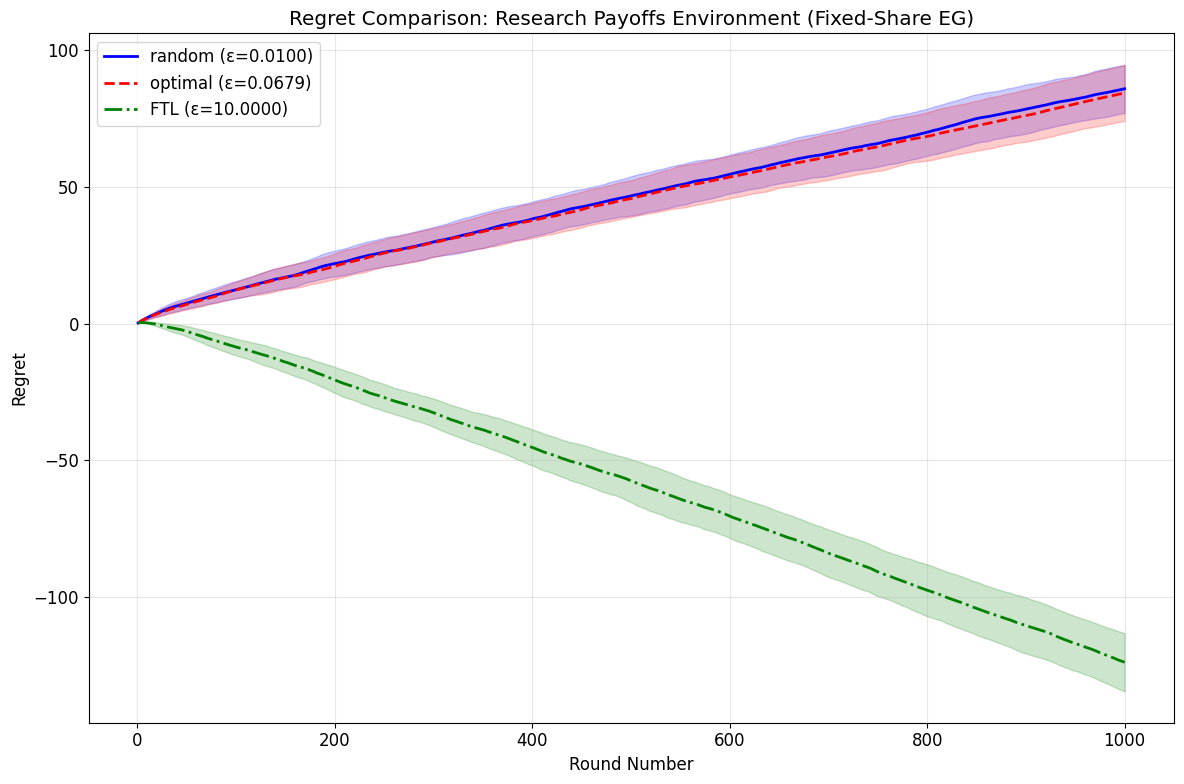

Generating payoff progression plot from CSV...


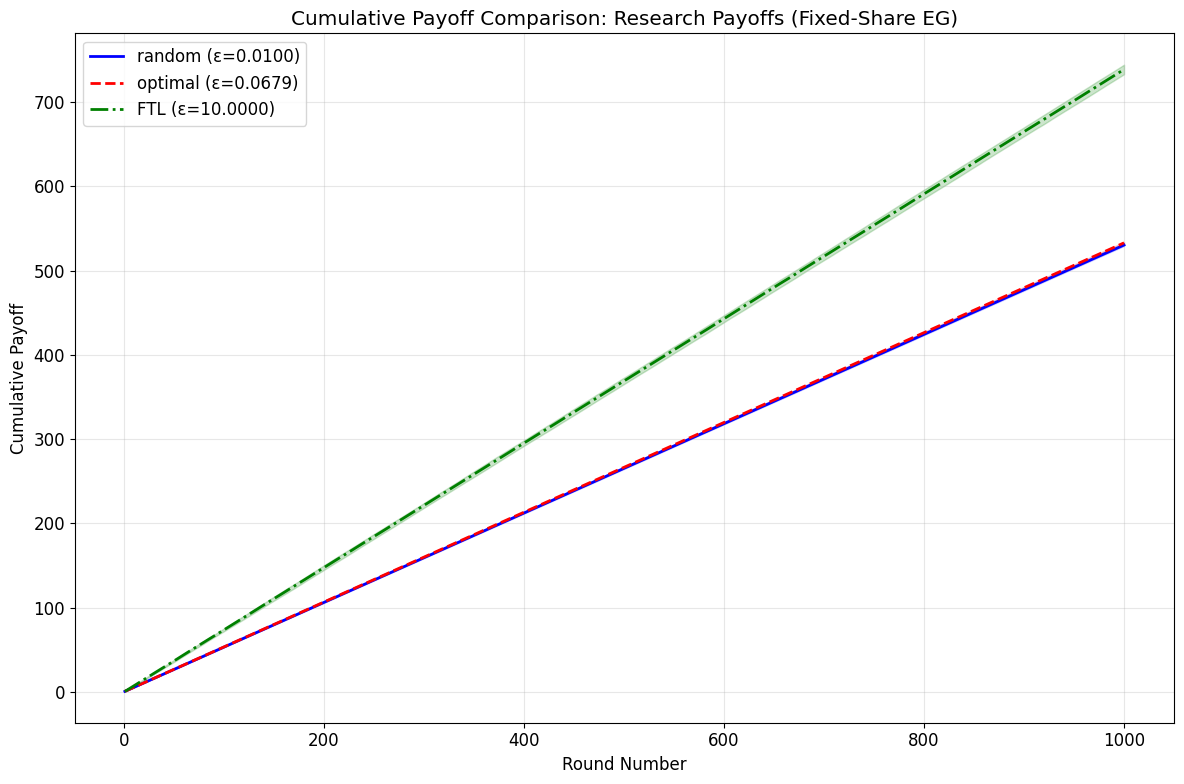


Research Payoffs Fixed-Share - Summary Statistics:
random (ε=0.010000):
  Final Regret: 85.9114 ± 8.8073
  Total Payoff: 530.5035 ± 1.0622

optimal (ε=0.067861):
  Final Regret: 84.3481 ± 10.1399
  Total Payoff: 533.0768 ± 1.0497

FTL (ε=10.000000):
  Final Regret: -123.7877 ± 10.6266
  Total Payoff: 738.9329 ± 5.7028

Weight Evolution Analysis:
Final weight distribution:
  Action 0 (MIT): 0.0984
  Action 1 (MIT): 0.1088 (LEADER)
  Action 2 (MIT): 0.0989
  Action 3 (Northwestern): 0.0969
  Action 4 (Northwestern): 0.1079 (LEADER)
  Action 5 (Northwestern): 0.0969
  Action 6 (Stanford): 0.1011 (LEADER)
  Action 7 (Stanford): 0.0962
  Action 8 (Stanford): 0.0969
  Action 9 (Stanford): 0.0979

Total payoff: 532.7822
Final regret: 92.2849


In [6]:
# Research Payoffs Visualization - Regret and Payoff Progression

import visualization

# Load the data
research_fs_df = pd.read_csv(data_dir / 'research_payoffs_fixed_share_results.csv')

print("Research Payoffs Fixed-Share Results - Data Overview:")
print(f"Shape: {research_fs_df.shape}")
print(f"Columns: {list(research_fs_df.columns)}")
print(f"Epsilon types: {research_fs_df['epsilon_type'].unique()}")
print()

# Use the plot_regret_comparison function from visualization.py
print("Generating regret comparison plot...")
visualization.plot_regret_comparison(
    research_fs_df,
    'Research Payoffs Environment (Fixed-Share EG)',
    'research_fs_regret_comparison.png'
)

# Plot payoff progression from CSV data
print("Generating payoff progression plot from CSV...")
visualization.plot_payoff_comparison(
    research_fs_df,
    "Research Payoffs (Fixed-Share EG)",
    "research_fs_payoff_progression.png"
)

# Summary statistics
print("\nResearch Payoffs Fixed-Share - Summary Statistics:")
print("=" * 50)

for epsilon_name in research_fs_df["epsilon_type"].unique():
    subset = research_fs_df[research_fs_df["epsilon_type"] == epsilon_name]
    final_regrets = subset['final_regret_mean'].iloc[0]
    final_regret_std = subset['final_regret_std'].iloc[0]
    total_payoffs = subset['final_payoff_mean'].iloc[0]
    total_payoff_std = subset['final_payoff_std'].iloc[0]
    
    print(f"{epsilon_name} (ε={subset['epsilon_value'].iloc[0]:.6f}):")
    print(f"  Final Regret: {final_regrets:.4f} ± {final_regret_std:.4f}")
    print(f"  Total Payoff: {total_payoffs:.4f} ± {total_payoff_std:.4f}")
    print()

# Weight evolution analysis (for a single simulation)
print("Weight Evolution Analysis:")
print("=" * 30)

# Run a single simulation to analyze weight evolution
k_research = 10
n_research = 1000
lambda_param = 0.1

# Test with optimal epsilon
epsilon_optimal = np.sqrt(2 * np.log(k_research) / n_research)
research_model_test = ResearchPayoffs(k=k_research, mu=0.5, delta=0.3, rho=0.5, h=0.1, sigma=0.1, seed=42)
fs_eg_test = FixedShareEG(k=k_research, epsilon=epsilon_optimal, n=n_research, lambda_param=lambda_param)

# Run algorithm
regret_history, total_payoff, cumulative_payoffs, payoff_history = fs_eg_test.run_algorithm(research_model_test.generate_payoffs)
weight_history = fs_eg_test.get_weight_history()

# Analyze final weights
final_weights = weight_history[-1, :]
print("Final weight distribution:")
for action in range(k_research):
    cluster_name = None
    for cluster, actions in research_model_test.clusters.items():
        if action in actions:
            cluster_name = cluster
            break
    
    leader_marker = " (LEADER)" if action in research_model_test.leaders.values() else ""
    print(f"  Action {action} ({cluster_name}): {final_weights[action]:.4f}{leader_marker}")

print(f"\nTotal payoff: {total_payoff:.4f}")
print(f"Final regret: {regret_history[-1]:.4f}")